In [2]:
import pandas as pd
import numpy as np
import scipy
from scipy import stats
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin
from statsmodels.stats.weightstats import ttest_ind
import statsmodels.api as sm


Loading the data

In [3]:
df = pd.read_csv("/Users/richardericsson/HI/slides_and_assesments_hi/math_and_stats/assesment/assessment_da25.csv")

Exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Variant                2000 non-null   object 
 1   Number of page views   2000 non-null   int64  
 2   GMV (in $)             2000 non-null   float64
 3   Number of add to cart  2000 non-null   int64  
 4   Clicks on media        2000 non-null   int64  
 5   Time on Page (sec)     2000 non-null   int64  
 6   user_id                2000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 109.5+ KB


In [5]:
df.head()

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.0,0,2,74,0
1,A,4,0.0,4,1,21,1
2,A,4,0.0,2,0,1,2
3,A,5,0.0,0,1,26,3
4,A,5,0.0,3,3,46,4


In [6]:
df.describe()

,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,5.151000,8.489760,2.176500,1.409500,20.295000,999.500000
std,2.333864,27.861282,1.518387,1.208528,19.964676,577.494589
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,0.000000,1.000000,1.000000,6.000000,499.750000
50%,5.000000,0.000000,2.000000,1.000000,14.000000,999.500000
75%,7.000000,0.000000,3.000000,2.000000,28.000000,1499.250000
max,15.000000,152.610000,10.000000,7.000000,143.000000,1999.000000


Sample size

In [21]:
sample_sizes = df["Variant"].value_counts()
print(sample_sizes)

Variant
A    1000
B    1000
Name: count, dtype: int64


Metrics

We're going to check the mean, std and plot the distribution of the metric

GMV

The mean GMV is 7.69 in A and 9.29 in B
The standard deviation of the gmv is 26.78 in A and 28.87 in B


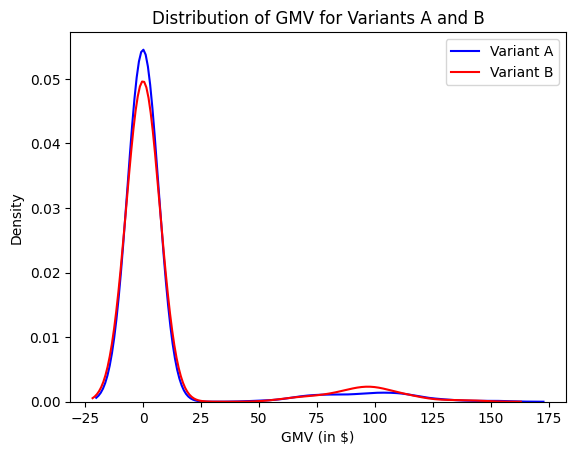

In [9]:
# Mean GMV
gmv_A = df[df["Variant"]=="A"]["GMV (in $)"].mean()
gmv_B = df[df["Variant"]=="B"]["GMV (in $)"].mean()

print("The mean GMV is {:.2f} in A and {:.2f} in B".format(gmv_A, gmv_B))

# standard deviation for each variant
std_gmv_A = np.sqrt(((df[df["Variant"]=="A"]["GMV (in $)"] - gmv_A) ** 2).mean())
std_gmv_B = np.sqrt(((df[df["Variant"]=="B"]["GMV (in $)"] - gmv_B) ** 2).mean())

print("The standard deviation of the gmv is {:.2f} in A and {:.2f} in B".format(std_gmv_A, std_gmv_B))

fig, ax = plt.subplots()

# GMV distribution for variant A
sns.kdeplot(df[df["Variant"]=="A"]["GMV (in $)"], ax=ax, color='blue', label='Variant A')

# GMV distribution for variant B
sns.kdeplot(df[df["Variant"]=="B"]["GMV (in $)"], ax=ax, color='red', label='Variant B')

ax.set_xlabel('GMV (in $)')
ax.set_ylabel('Density')
ax.set_title('Distribution of GMV for Variants A and B')
ax.legend()
plt.show()

Number of add to cart

The mean add to cart is 1.88 in A and 2.47 in B
The standard deviation of the number of add to cart is 1.30 in A and 1.66 in B


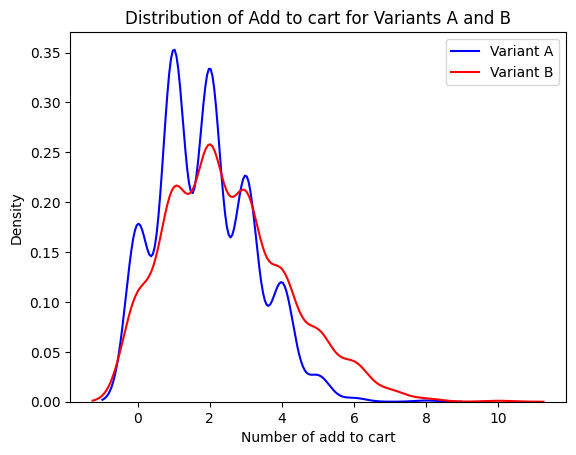

In [10]:
# Mean of add to cart
cart_A = df[df["Variant"]=="A"]["Number of add to cart"].mean()
cart_B = df[df["Variant"]=="B"]["Number of add to cart"].mean()

print("The mean add to cart is {:.2f} in A and {:.2f} in B".format(cart_A, cart_B))

# standard deviation for each variant
std_cart_A = np.sqrt(((df[df["Variant"]=="A"]["Number of add to cart"] - cart_A) ** 2).mean())
std_cart_B = np.sqrt(((df[df["Variant"]=="B"]["Number of add to cart"] - cart_B) ** 2).mean())

print("The standard deviation of the number of add to cart is {:.2f} in A and {:.2f} in B".format(std_cart_A, std_cart_B))

fig, ax = plt.subplots()

# distribution of page views for variant A
sns.kdeplot(df[df["Variant"]=="A"]["Number of add to cart"], ax=ax, color='blue', label='Variant A')

# distribution of page views for variant B
sns.kdeplot(df[df["Variant"]=="B"]["Number of add to cart"], ax=ax, color='red', label='Variant B')

ax.set_xlabel('Number of add to cart')
ax.set_ylabel('Density')
ax.set_title('Distribution of Add to cart for Variants A and B')
ax.legend()
plt.show()

Central Limit Theorem (CLT)

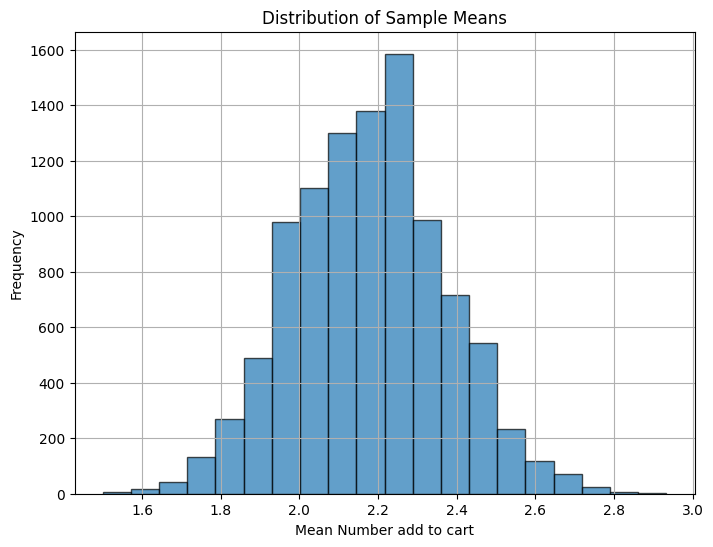

In [11]:
sample_means = []
sample_size = 10000  # Number of samples to take
sample_count = 60  # Number of data points in each sample

for _ in range(sample_size):
    sample = df.sample(n=sample_count)
    sample_mean = sample["Number of add to cart"].mean()
    sample_means.append(sample_mean)

# Plotting the distribution of sample means
plt.figure(figsize=(8, 6))
plt.hist(sample_means, bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sample Means')
plt.xlabel('Mean Number add to cart')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Clicks on media

The mean clicks on media is 1.50 in A and 1.32 in B
The standard deviation of the number of add to cart is 1.23 in A and 1.18 in B


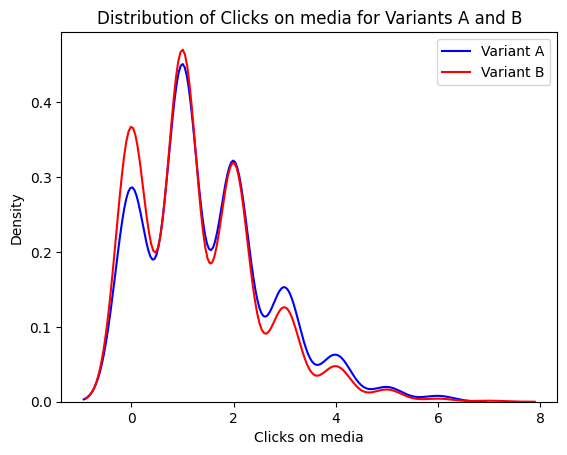

In [14]:
# Mean clicks on media
click_A = df[df["Variant"]=="A"]["Clicks on media"].mean()
click_B = df[df["Variant"]=="B"]["Clicks on media"].mean()

print("The mean clicks on media is {:.2f} in A and {:.2f} in B".format(click_A, click_B))

# standard deviation for each variant
std_click_A = np.sqrt(((df[df["Variant"]=="A"]["Clicks on media"] - click_A) ** 2).mean())
std_click_B = np.sqrt(((df[df["Variant"]=="B"]["Clicks on media"] - click_B) ** 2).mean())

print("The standard deviation of the number of add to cart is {:.2f} in A and {:.2f} in B".format(std_click_A, std_click_B))

fig, ax = plt.subplots()

# distribution of page views for variant A
sns.kdeplot(df[df["Variant"]=="A"]["Clicks on media"], ax=ax, color='blue', label='Variant A')

# distribution of page views for variant B
sns.kdeplot(df[df["Variant"]=="B"]["Clicks on media"], ax=ax, color='red', label='Variant B')

ax.set_xlabel('Clicks on media')
ax.set_ylabel('Density')
ax.set_title('Distribution of Clicks on media for Variants A and B')
ax.legend()
plt.show()

Central Limit Theorem (CLT)

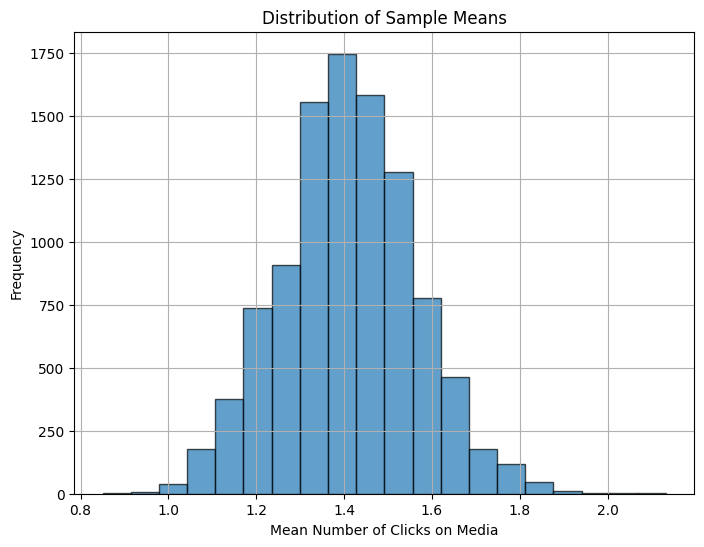

In [15]:
sample_means = []
sample_size = 10000  # Number of samples to take
sample_count = 60  # Number of data points in each sample

for _ in range(sample_size):
    sample = df.sample(n=sample_count)
    sample_mean = sample["Clicks on media"].mean()
    sample_means.append(sample_mean)

# Plotting the distribution of sample means
plt.figure(figsize=(8, 6))
plt.hist(sample_means, bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Sample Means')
plt.xlabel('Mean Number of Clicks on Media')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

T-Test

Number of add to cart

In [23]:
clicks_on_media_ttest = pingouin.ttest(x=df[df["Variant"]=="A"]["Number of add to cart"],
                        y=df[df["Variant"]=="B"]["Number of add to cart"],
                        paired=False,
                        alternative="two-sided")

clicks_on_media_ttest

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-8.777389,1998,two-sided,3.517079e-18,"[-0.72, -0.45]",0.392537,1.022e+15,1.0


Clicks on Media

In [22]:
clicks_on_media_ttest = pingouin.ttest(x=df[df["Variant"]=="A"]["Clicks on media"],
                        y=df[df["Variant"]=="B"]["Clicks on media"],
                        paired=False,
                        alternative="two-sided")

clicks_on_media_ttest

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,3.17107,1998,two-sided,0.001542,"[0.07, 0.28]",0.141815,7.306,0.88678


GMV

In [20]:
gmv_ttest = pingouin.ttest(x=df[df["Variant"]=="A"]["GMV (in $)"],
                        y=df[df["Variant"]=="B"]["GMV (in $)"],
                        paired=False,
                        alternative="two-sided")

gmv_ttest

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.283954,1998,two-sided,0.199307,"[-4.04, 0.84]",0.05742,0.114,0.249912
